## A.I. Assignment 4

## Learning Goals

By the end of this lab, you should be able to:
* Get familiar with tensors in pytorch
* Get familiar with the activation functions for ANN 
* Create a simple perceptron model with pytorch



## Common activation functions for ANN:

##### Sigmoid:

The sigmoid function is a popular choice for activation functions in neural networks. It has an $S-shaped$ curve:
$$f(x) = \frac{1}{1+e^{-x}}.$$

It has a number of appealing qualities:

1. *Nonlinearity*: Because the sigmoid function is nonlinear, it enables the neural network to simulate nonlinear interactions between inputs and outputs. A neural network would simply be a linear model without a nonlinear activation function like sigmoid, which would significantly restrict its capacity to describe complex relationships.

1. *Smoothness*: As the sigmoid function is differentiable and smooth, its derivative exist at every point. This is significant because it makes it possible for neural network training techniques based on gradients (such as backpropagation) to perform well.

1. *Boundedness*: The sigmoid function is bounded between 0 and 1, it means  its outputs can be interpreted as probabilities.  It is most useful in applications like binary classification, where the goal is to predict whether an input belongs to one of two classes.

1. *Monotonicity*: The sigmoid function is monotonic, which means that its outputs are always increasing or always decreasing with respect to its inputs. This makes it easy to interpret the effect of changes in input variables on the output of the network.

##### ReLU (Rectified Linear Unit):

The ReLU function is defined as $$f(x) = max(0, x).$$

It is a widely used activation function in deep learning due to its simplicity and effectiveness.

##### Tanh (Hyperbolic Tangent):

The $\tanh$ function is similar to the sigmoid function but produces outputs in the interval $[-1, 1]$:  
$$f(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}.$$

##### Softmax:

The softmax function is commonly used in the output layer of a neural network for multi-class classification problems. It normalizes the output into a probability distribution over the classes.

Given a vector $\vec{z}$ of $n$ real numbers, the softmax function calculates a vector $\vec{s}$ of $n$ real numbers with the components:
$$s_j = \frac{e^{z_j}}{\sum_{k=1}^{n} {e^{z_k}}}.$$


##### Leaky ReLU:

The Leaky ReLU is a variation of the ReLU function that introduces a small non-zero gradient for negative inputs. It is defined as 
$$f(x) = max(0.01 \cdot x, x).$$

##### ELU (Exponential Linear Unit):

The ELU function is another variation of the ReLU function that introduces a small negative saturation value for negative inputs. It is defined as 

$$ f(x) = \biggl\{ \begin{matrix} x, & for & x > 0 \\
                      \alpha \cdot (e^{x} - 1), & for & x \leq 0 \end{matrix}$$
where $\alpha$ is a hyperparameter.

##### Swish:

The Swish function is a recent activation function that is a smooth approximation of the ReLU function. It is defined as f(x) = x * sigmoid(x).


In [96]:
import torch
torch.cuda.is_available()

False

create a tensor with requires_grad=True to tell PyTorch to track gradients for this tensor:

In [97]:
x = torch.tensor([2.0], requires_grad=True)
print(x)

tensor([2.], requires_grad=True)


You can perform any operations on this tensor as usual:

In [98]:
y = x ** 2 + 2 * x + 1
print(y)

tensor([9.], grad_fn=<AddBackward0>)


To compute the gradients of y with respect to x, you need to call backward() on y:

In [99]:
y.backward()

In [100]:
x.grad

tensor([6.])

In [101]:
import torch

# Create a tensor with requires_grad=True
x = torch.tensor([1., 2., 3.], requires_grad=True)

# Compute a function of x
y = x.sum()

# Compute gradients of y with respect to x
y.backward()

# Print gradients of x
print(x.grad)


tensor([1., 1., 1.])


Exercise 1.

Compute the gradient for the sigmoid activation function in 2 points using pytorch and check it with the known explicit formula 

In [102]:
import torch
import numpy as np

import matplotlib.pyplot as plt

x1 = torch.tensor([0.0], requires_grad=True)
x2 = torch.tensor([2.0], requires_grad=True)

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

y1 = sigmoid(x1)
y2 = sigmoid(x2)

y1.backward()
grad1_pytorch = x1.grad.item()


x1.grad.zero_()

y2.backward()
grad2_pytorch = x2.grad.item()

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

grad1_explicit = sigmoid_derivative(x1).item()
grad2_explicit = sigmoid_derivative(x2).item()

print(f"Point x=0:")
print(f"  Sigmoid value: {y1.item():.6f}")
print(f"  PyTorch gradient: {grad1_pytorch:.6f}")
print(f"  Explicit formula: {grad1_explicit:.6f}")
print(f"  Difference: {abs(grad1_pytorch - grad1_explicit):.10f}")

print(f"\nPoint x=2:")
print(f"  Sigmoid value: {y2.item():.6f}")
print(f"  PyTorch gradient: {grad2_pytorch:.6f}")
print(f"  Explicit formula: {grad2_explicit:.6f}")
print(f"  Difference: {abs(grad2_pytorch - grad2_explicit):.10f}")

Point x=0:
  Sigmoid value: 0.500000
  PyTorch gradient: 0.250000
  Explicit formula: 0.250000
  Difference: 0.0000000000

Point x=2:
  Sigmoid value: 0.880797
  PyTorch gradient: 0.104994
  Explicit formula: 0.104994
  Difference: 0.0000000596


Exercise 2.

Compute the gradient for the linear activation function in 2 points using pytorch and check it with the known explicit formula

In [103]:
import torch
import numpy as np

x1 = torch.tensor([0.0], requires_grad=True)
x2 = torch.tensor([2.0], requires_grad=True)

def linear(x):
    return x

y1 = linear(x1)
y2 = linear(x2)

y1.backward()
grad1_pytorch = x1.grad.item()

x1.grad.zero_()
x2.grad.zero_()

y2.backward()
grad2_pytorch = x2.grad.item()

def linear_derivative(x):
    return torch.ones_like(x)

grad1_explicit = linear_derivative(x1).item()
grad2_explicit = linear_derivative(x2).item()

print(f"Point x=0:")
print(f"  Linear value: {y1.item():.6f}")
print(f"  PyTorch gradient: {grad1_pytorch:.6f}")
print(f"  Explicit formula: {grad1_explicit:.6f}")
print(f"  Difference: {abs(grad1_pytorch - grad1_explicit):.10f}")

print(f"\nPoint x=2:")
print(f"  Linear value: {y2.item():.6f}")
print(f"  PyTorch gradient: {grad2_pytorch:.6f}")
print(f"  Explicit formula: {grad2_explicit:.6f}")
print(f"  Difference: {abs(grad2_pytorch - grad2_explicit):.10f}")

AttributeError: 'NoneType' object has no attribute 'zero_'

Execise 3.

Compute the gradient for the relu activation function in 2 points using pytorch and check it with the known explicit formula.

In [ ]:
import torch
import numpy as np

x1 = torch.tensor([-1.0], requires_grad=True)
x2 = torch.tensor([2.0], requires_grad=True)

def relu(x):
    return torch.max(torch.zeros_like(x), x)

y1 = relu(x1)
y2 = relu(x2)

y1.backward()
grad1_pytorch = x1.grad.item()

x1.grad.zero_()
x2.grad.zero_()

y2.backward()
grad2_pytorch = x2.grad.item()

def relu_derivative(x):
    return (x > 0).float()

grad1_explicit = relu_derivative(x1).item()
grad2_explicit = relu_derivative(x2).item()

print(f"Point x=-1:")
print(f"  ReLU value: {y1.item():.6f}")
print(f"  PyTorch gradient: {grad1_pytorch:.6f}")
print(f"  Explicit formula: {grad1_explicit:.6f}")
print(f"  Difference: {abs(grad1_pytorch - grad1_explicit):.10f}")

print(f"\nPoint x=2:")
print(f"  ReLU value: {y2.item():.6f}")
print(f"  PyTorch gradient: {grad2_pytorch:.6f}")
print(f"  Explicit formula: {grad2_explicit:.6f}")
print(f"  Difference: {abs(grad2_pytorch - grad2_explicit):.10f}")

Exercise 4. 

Write in python a function to plot the sigmoid activation function and its gradient using matplotlib

In [ ]:
import torch
import numpy as np

import matplotlib.pyplot as plt

def plot_sigmoid_and_gradient():
    # Create x values
    x = np.linspace(-10, 10, 1000)
    
    # Convert to torch tensor for computation
    x_tensor = torch.tensor(x, requires_grad=False)
    
    # Calculate sigmoid
    sigmoid_x = 1 / (1 + torch.exp(-x_tensor))
    
    # Calculate derivative of sigmoid
    sigmoid_derivative = sigmoid_x * (1 - sigmoid_x)
    
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot sigmoid in the first subplot
    ax1.plot(x, sigmoid_x.numpy(), 'b-', linewidth=2)
    ax1.set_title('Sigmoid Function')
    ax1.set_xlabel('x')
    ax1.set_ylabel('sigmoid(x)')
    ax1.grid(True)
    ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax1.axhline(y=1, color='k', linestyle='-', alpha=0.3)
    ax1.axhline(y=0.5, color='k', linestyle='--', alpha=0.3)
    ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    # Plot sigmoid derivative in the second subplot
    ax2.plot(x, sigmoid_derivative.numpy(), 'r-', linewidth=2)
    ax2.set_title('Sigmoid Derivative')
    ax2.set_xlabel('x')
    ax2.set_ylabel('sigmoid\'(x)')
    ax2.grid(True)
    ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax2.axhline(y=0.25, color='k', linestyle='--', alpha=0.3)
    ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Call the function to generate the plots
plot_sigmoid_and_gradient()

Exercise 5. 

Write in python a function to plot the ReLU activation function and its gradient using matplotlib.

In [ ]:
import torch
import numpy as np

import matplotlib.pyplot as plt

def plot_relu_and_gradient():
    x = np.linspace(-10, 10, 1000)
    x_tensor = torch.tensor(x, requires_grad=False)
    relu_x = torch.maximum(torch.zeros_like(x_tensor), x_tensor)
    relu_derivative = (x_tensor > 0).float()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    ax1.plot(x, relu_x.numpy(), 'b-', linewidth=2)
    ax1.set_title('ReLU Function')
    ax1.set_xlabel('x')
    ax1.set_ylabel('ReLU(x)')
    ax1.grid(True)
    ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    ax2.plot(x, relu_derivative.numpy(), 'r-', linewidth=2)
    ax2.set_title('ReLU Derivative')
    ax2.set_xlabel('x')
    ax2.set_ylabel('ReLU\'(x)')
    ax2.grid(True)
    ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax2.axhline(y=1, color='k', linestyle='--', alpha=0.3)
    ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_relu_and_gradient()

Exercise 6. 

Write in python a function to plot the tanh activation function and its gradient using matplotlib.

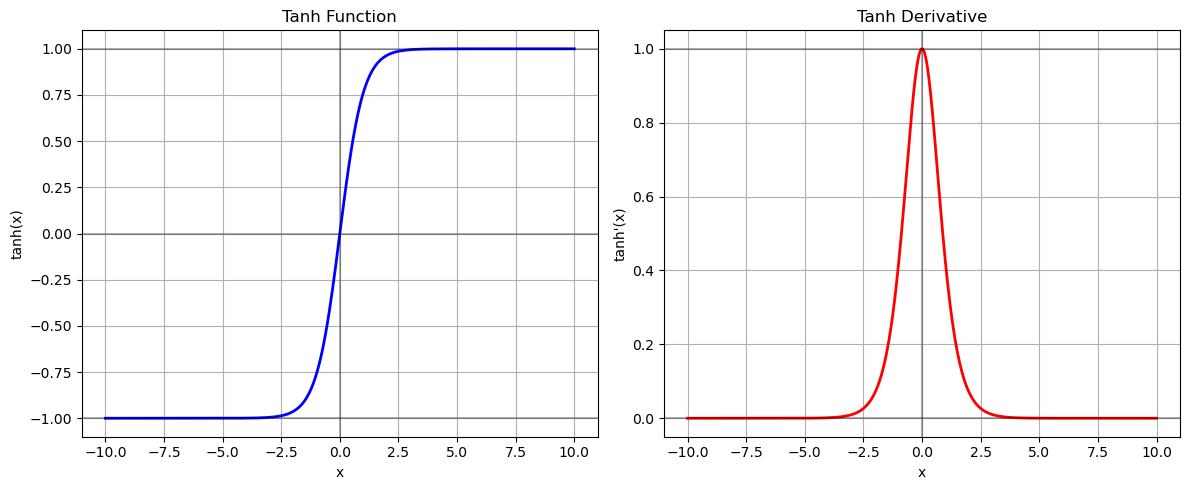

In [ ]:
import torch
import numpy as np

import matplotlib.pyplot as plt

def plot_tanh_and_gradient():
    x = np.linspace(-10, 10, 1000)
    
    x_tensor = torch.tensor(x, requires_grad=False)
    tanh_x = torch.tanh(x_tensor)
    tanh_derivative = 1 - tanh_x**2
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    ax1.plot(x, tanh_x.numpy(), 'b-', linewidth=2)
    ax1.set_title('Tanh Function')
    ax1.set_xlabel('x')
    ax1.set_ylabel('tanh(x)')
    ax1.grid(True)
    ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax1.axhline(y=1, color='k', linestyle='-', alpha=0.3)
    ax1.axhline(y=-1, color='k', linestyle='-', alpha=0.3)
    ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    ax2.plot(x, tanh_derivative.numpy(), 'r-', linewidth=2)
    ax2.set_title('Tanh Derivative')
    ax2.set_xlabel('x')
    ax2.set_ylabel('tanh\'(x)')
    ax2.grid(True)
    ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax2.axhline(y=1, color='k', linestyle='-', alpha=0.3)
    ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_tanh_and_gradient()

Exercise 7. 

Write in python a function to plot the leaky ReLU activation function and its gradient using matplotlib.

In [ ]:
import torch
import numpy as np

import matplotlib.pyplot as plt

def plot_leaky_relu_and_gradient(alpha=0.01):
    x = np.linspace(-10, 10, 1000)
    x_tensor = torch.tensor(x, requires_grad=False)
    leaky_relu_x = torch.maximum(alpha * x_tensor, x_tensor)
    
    leaky_relu_derivative = torch.ones_like(x_tensor)
    leaky_relu_derivative[x_tensor < 0] = alpha
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    ax1.plot(x, leaky_relu_x.numpy(), 'b-', linewidth=2)
    ax1.set_title('Leaky ReLU Function')
    ax1.set_xlabel('x')
    ax1.set_ylabel('Leaky ReLU(x)')
    ax1.grid(True)
    ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    ax2.plot(x, leaky_relu_derivative.numpy(), 'r-', linewidth=2)
    ax2.set_title('Leaky ReLU Derivative')
    ax2.set_xlabel('x')
    ax2.set_ylabel('Leaky ReLU\'(x)')
    ax2.grid(True)
    ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax2.axhline(y=1, color='k', linestyle='--', alpha=0.3)
    ax2.axhline(y=alpha, color='k', linestyle='--', alpha=0.3)
    ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_leaky_relu_and_gradient()

## Perceptron

We define a class called *Perceptron* that inherits from *torch.nn.Module*. 

In the constructor, we define a single fully-connected linear layer with $input_dim$ inputs and $output_dim$ outputs, and a $sigmoid$ activation function. In the forward method, we apply the linear transformation to the input $x$, and then apply the sigmoid activation function to the output.



In [ ]:
import torch
import torch.nn as nn

input_size = 2
output_size = 1

class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x


 We create an instance of this model and use it to make predictions like this:

In [ ]:
perceptron = Perceptron(input_size, output_size)
x = torch.tensor([0.5, 0.2])
y = perceptron(x)
print(y)


tensor([0.6975], grad_fn=<SigmoidBackward0>)


In [ ]:

criterion = nn.BCELoss()  
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1) 

input_data = torch.randn((10, input_size))
labels = torch.randint(0, 2, (10, output_size)).float()

num_epochs = 1000
for epoch in range(num_epochs):
    outputs = perceptron(input_data)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.6210
Epoch [200/1000], Loss: 0.5954
Epoch [300/1000], Loss: 0.5888
Epoch [400/1000], Loss: 0.5869
Epoch [500/1000], Loss: 0.5863
Epoch [600/1000], Loss: 0.5861
Epoch [700/1000], Loss: 0.5861
Epoch [800/1000], Loss: 0.5861
Epoch [900/1000], Loss: 0.5861
Epoch [1000/1000], Loss: 0.5861


Exercise 8: 

Implement a binary classification model using the Perceptron class in PyTorch for the logic OR. 

Your task is to create a Perceptron instance and train it using a proper  dataset and the binary cross-entropy loss with stochastic gradient descent optimizer. 

Here are the steps you can follow:

Define a Perceptron class that inherits from torch.nn.Module and implements a binary classification model.

Define a binary cross-entropy loss function using the torch.nn.BCEWithLogitsLoss module.

Define a stochastic gradient descent optimizer using the torch.optim.SGD module.

Train the Perceptron model on the training set using the binary cross-entropy loss and stochastic gradient descent optimizer.

Evaluate the trained model compute the accuracy.


Epoch [50/1000], Loss: 0.6461
Epoch [100/1000], Loss: 0.6306
Epoch [150/1000], Loss: 0.6213
Epoch [200/1000], Loss: 0.6108
Epoch [250/1000], Loss: 0.5974
Epoch [300/1000], Loss: 0.5801
Epoch [350/1000], Loss: 0.5594
Epoch [400/1000], Loss: 0.5362
Epoch [450/1000], Loss: 0.5110
Epoch [500/1000], Loss: 0.4847
Epoch [550/1000], Loss: 0.4565
Epoch [600/1000], Loss: 0.4259
Epoch [650/1000], Loss: 0.3926
Epoch [700/1000], Loss: 0.3568
Epoch [750/1000], Loss: 0.3239
Epoch [800/1000], Loss: 0.3056
Epoch [850/1000], Loss: 0.2929
Epoch [900/1000], Loss: 0.2847
Epoch [950/1000], Loss: 0.2779
Epoch [1000/1000], Loss: 0.2738

Model evaluation:
Inputs:
tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])
Target outputs:
tensor([[0., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.]])
Predicted outputs (raw):
tensor([[0.0539, 0.6329],
        [0.0539, 0.6329],
        [0.0539, 0.6329],
        [0.9560, 0.0582]])
Predicted outputs (classified):
tensor([[0., 1.],
        [0.

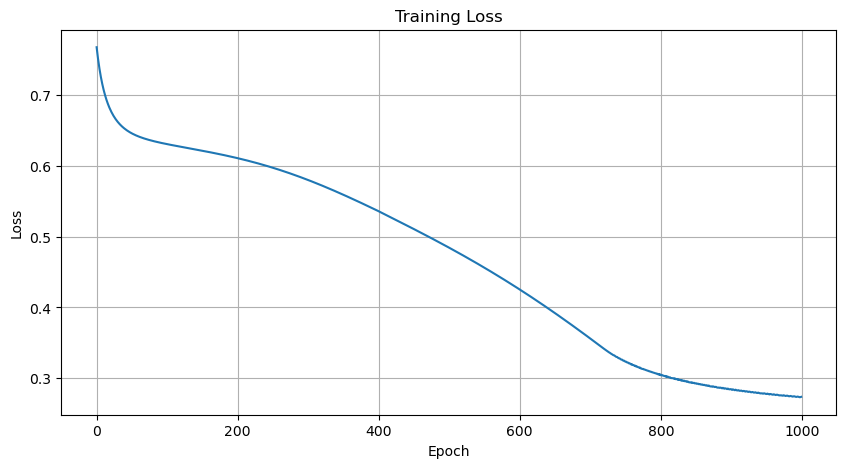

In [109]:
numt = 1000
hln = 1 
hls = 1
import torch
import numpy as np

import torch.nn as nn
import matplotlib.pyplot as plt

class Perceptron(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_size=4, hidden_layers=1):
        super(Perceptron, self).__init__()
        self.layers = nn.ModuleList()
        
        self.layers.append(nn.Linear(input_dim, hidden_size))
        
        for i in range(hidden_layers - 1):
            self.layers.append(nn.Linear(hidden_size, hidden_size))
            
        self.layers.append(nn.Linear(hidden_size, output_dim))
        
        self.activation = nn.Sigmoid()
        
    def forward(self, x):
        for i in range(len(self.layers) - 1):
            x = torch.relu(self.layers[i](x))
            
        x = self.layers[-1](x)
        x = self.activation(x)
        return x

X_train = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y_train = torch.tensor([[0,0], [0,1], [0,1], [1,0]], dtype=torch.float32)

input_size = 2
output_size = 2
model = Perceptron(input_size, output_size, hidden_size=hls, hidden_layers=hln)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

losses = []

for epoch in range(numt):
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    losses.append(loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{numt}], Loss: {loss.item():.4f}')

with torch.no_grad():
    y_pred = model(X_train)
    y_pred_class = (y_pred > 0.5).float()
    accuracy = (y_pred_class == y_train).float().mean()
    
    print(f'\nModel evaluation:')
    print(f'Inputs:')
    print(X_train)
    print(f'Target outputs:')
    print(y_train)
    print(f'Predicted outputs (raw):')
    print(y_pred)
    print(f'Predicted outputs (classified):')
    print(y_pred_class)
    print(f'Accuracy: {accuracy.item():.4f}')

plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()
